In [291]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [292]:
def GaussianNoise(u,sigma,x):
  noise = (1/(sigma*(2*np.pi)**(1/2)))*np.exp(-(1/2)*((x-u)/sigma)**2)
  return noise

In [293]:
X=[]
y=[]
for i in range(-250,250):
  X.append(i)
  y.append(i*i + GaussianNoise(0,1,i*i))


In [294]:
df = pd.DataFrame()
df['X']=X
df['y']=y

df

,X,y
0,-250,62500.0
1,-249,62001.0
2,-248,61504.0
3,-247,61009.0
4,-246,60516.0
...,...,...
495,245,60025.0
496,246,60516.0
497,247,61009.0
498,248,61504.0


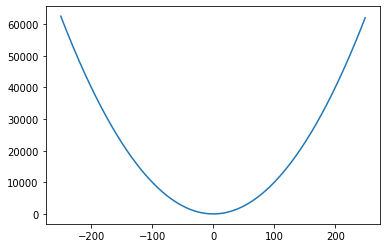

In [295]:
plt.plot(X,y)
plt.show()

In [296]:
print(df['X'].shape)

(500,)


In [297]:
Xtrain = np.array(df['X'][:int(0.8*len(X))]).reshape(-1,1)
ytrain = np.array(df['y'][:int(0.8*len(y))]).reshape(-1,1)
Xtest = np.array(df['X'][int(0.8*len(X)):]).reshape(-1,1)
ytest = np.array(df['y'][int(0.8*len(y)):]).reshape(-1,1)

In [298]:
print(Xtrain.shape)

(400, 1)


In [299]:
X= [[1]]
X2= [1]
print(len(np.array(X).shape))
print(len(np.array(X2).shape))

2
1


In [350]:
def getActivation(activation):
  def Relu(x):
    y=(x+np.sign(x)*x)//2
    return y
  def Identity(x):
    return x
  if activation == 'ReLu':
    return Relu
  elif activation == 'Identity':
    return Identity
  
def activationGradient(activation):
  def Relu(x):
    y=(1+np.sign(x))//2
    return y
  if activation == 'ReLu':
    return Relu

def getLoss(loss):
  def sse(y,y_pred):
      return np.sum((y-y_pred)**2)
  if loss == 'SumOfSquares':
    return sse

def getGradient(loss):
  def sse(y,y_pred):
      return -2*(y-y_pred)
  if loss == 'SumOfSquares':
    return sse

class Layer:
  def __init__(self,n_nodes,in_weights,biases,activation='ReLu'):
    #self.nodes=nodes
    #self.n_nodes=len(nodes)
    self.n_nodes = n_nodes
    self.in_weights=in_weights.T
    self.biases = biases
    self.y=np.array([0.0]*self.n_nodes)
    self.activation = activation

# class Node:
#   def __init__(self,incoming,bias):
#     self.incoming=incoming
#     self.bias=bias

class NNetwork:
  def __init__(self,n_in,n_hidden,n_out,nodes_per_layer=2):
    self.n_in=n_in
    self.n_out=n_out
    self.n_hidden=n_hidden
    self.nodes_per_layer = nodes_per_layer
    self.n_weights = 0
    self.Layers = []
    self.Layers.append(Layer(n_in,np.array([]),np.array([])))
    print("Gaussian : ",GaussianNoise(0,1,np.random.uniform(-1,1,size=(self.nodes_per_layer,self.n_in))))
    self.Layers.append(Layer(self.nodes_per_layer,np.array(GaussianNoise(0,1,np.random.uniform(-1,1,size=(self.nodes_per_layer,self.n_in)))),np.array([0.0]*self.nodes_per_layer)))
    for i in range(1,n_hidden):
      #self.Layers.append(Layer(self.nodes_per_layer))
      #nodes=[]
      incoming_edges_per_node=self.Layers[-1].n_nodes
      
      self.Layers.append(Layer(self.nodes_per_layer,np.array(GaussianNoise(0,1,np.random.uniform(-1,1,size=(self.nodes_per_layer,incoming_edges_per_node)))),np.array([0.0]*self.nodes_per_layer)))
    self.Layers.append(Layer(n_out,np.array(GaussianNoise(0,1,np.random.uniform(-1,1,size=(self.n_out,self.Layers[-1].n_nodes)))),np.array([0.0]*self.n_out),activation='Identity'))
    self.n_weights=self.n_in*self.Layers[0].n_nodes
    for i in range(1,len(self.Layers)-1):
      layer_weights_shape= self.Layers[i].in_weights.shape
      for r in range(layer_weights_shape[0]):
        for c in range(layer_weights_shape[1]):
          self.Layers[i].in_weights[r][c]= GaussianNoise(0,1,np.random.randint(-1,1))
          print(self.Layers[i].in_weights[r][c])
      print(layer_weights_shape)
      self.n_weights+= layer_weights_shape[0]*layer_weights_shape[1]
    self.weights = [0.0]*self.n_weights
  
  def NetworkStats(self):
    print("Total Layers : ", self.n_in+self.n_out+self.n_hidden)
    print("Total Hidden Layers : ", self.n_hidden)
    print("----LAYER 0----")
    print("Total Input : ", self.n_in)
    print("Len layers : ",len(self.Layers))
    for i in range (1,len(self.Layers)):
      print("----LAYER ",i,"----")
      print("Total Nodes : ", self.Layers[i].n_nodes)
      layer_weights_shape= self.Layers[i].in_weights.shape
      print("Total Incoming Edges per Node : ", layer_weights_shape[0]*layer_weights_shape[1])
      print("Total Biases : ", len(self.Layers[i].biases))
    print("\nTotal Weights : ", self.n_weights)
  
  def BackPropogation(self,X,y_true,alpha=1e-5,max_iter=1000,Loss="SumOfSquares"):
    if(len(np.array(X).shape)<2):
      print(" INVALID X SHAPE : ",X.shape)
    self.Layers[0].y = X
    grad = getGradient(Loss)
    lf = getLoss(Loss)
    losses=[]
    for itr in range(max_iter):
      print("---ITR ",itr+1,"---")
      #forwardpass 
      ac=getActivation(self.Layers[1].activation)

      self.Layers[1].y = ac(np.dot(X,self.Layers[1].in_weights) + self.Layers[1].biases)
      print("Layer 1 : ",np.sum(self.Layers[1].y))
      for i in range(2,len(self.Layers)):
        print(self.Layers[i].activation)
        ac=getActivation(self.Layers[i].activation)
        print("Layer ",i," weights : ",self.Layers[i].in_weights)
        #np.dot(X.T,w) 
        self.Layers[i].y  = ac(np.dot(self.Layers[i-1].y,self.Layers[i].in_weights)+ self.Layers[i].biases)
        print(i," ",self.Layers[i].y.shape)

      print("After forward pass : ",np.sum(self.Layers[-1].y))
      #plt.plot()

      #BackPropogation
      n=len(X)
      print(n)
      
      dLdy = grad(y_true,self.Layers[-1].y)
      print("Gradient of Loss : ",np.sum(dLdy))
      
      losses.append(lf(y_true,self.Layers[-1].y))
      print("LOSS : ",  losses[-1])
      print("y shape ",self.Layers[-2].y.shape)
      dLdw = np.dot(self.Layers[-2].y.T,dLdy)
      print("dLdw : ",dLdw)
      dLdb = np.sum(dLdy,axis=0)
      
      print("dLdb : ",dLdb)
      dLdx=np.dot(dLdy,self.Layers[-1].in_weights.T)
      print("dLdx shape : ",dLdx.shape)
      print("dldw ",dLdw.shape, " weights shape : ",self.Layers[-1].in_weights.shape)
      self.Layers[-1].in_weights-=alpha*dLdw/n
      self.Layers[-1].biases-=alpha*dLdb/n
      
      for j in range(1,len(self.Layers)-1):
        i=len(self.Layers)-j-1
        print("---LAYER ",i,"---")
        acgrad = activationGradient(self.Layers[i].activation)
        dLdy=dLdx
        print(dLdy.shape)
        dg = acgrad(np.dot(self.Layers[i-1].y,self.Layers[i].in_weights)+self.Layers[i].biases)
        print("dg sum = ",np.sum(dg))
        print("dg shape ",dg.shape)
        dLdb = np.sum(np.multiply(dg,dLdy),axis=0)
        print(" dLdb shape ", dLdb.shape)
        #print("y shape ",np.sum(self.Layers[i-1].y,axis=0).shape)
        print("dg shape ",dg.shape," y values shape for Layer",i-1," ",self.Layers[i-1].y.shape)
        #dLdw = np.sum(np.dot(self.Layers[i-1].y,np.dot(dLdy,dg)),axis=0)
        print("dLdy shape : ",dLdy.shape)
        dLdw = np.dot(np.multiply(dg,dLdy).T,self.Layers[i-1].y)
        print("dLdw : ",dLdw)
        print("dLdw shape : ",dLdw.shape)
        print("Weights shape : ",self.Layers[i].in_weights.shape)
        intermediate = np.multiply(dg,dLdy)
        #print("Intermediate : ",intermediate)
        dLdx = np.dot(intermediate,self.Layers[i].in_weights.T)
        print("dLdx shape : ",dLdx.shape)
        #Update weights and biases 
        
        print("dLdb shape ",dLdb.shape)
        self.Layers[i].in_weights-=alpha*(dLdw.T)/n
        self.Layers[i].biases-=alpha*dLdb/n
        print("Updated weights ",self.Layers[i].in_weights)
    
  def predict(self,X):
    ac=getActivation(self.Layers[1].activation)
    self.Layers[1].y = ac(np.dot(X,self.Layers[1].in_weights) + self.Layers[1].biases)
    print("Layer 1 : ",np.sum(self.Layers[1].y))
    for i in range(2,len(self.Layers)):
      print(self.Layers[i].activation)
      ac=getActivation(self.Layers[i].activation)
      print("Layer ",i," weights : ",self.Layers[i].in_weights)
      #np.dot(X.T,w) 
      self.Layers[i].y  = ac(np.dot(self.Layers[i-1].y,self.Layers[i].in_weights)+ self.Layers[i].biases)
      print(i," ",self.Layers[i].y.shape)

    print("After forward pass : ",np.sum(self.Layers[-1].y))
    return self.Layers[-1].y



      


    

In [355]:
net = NNetwork(1,1,1)

Gaussian :  [[0.35036654]
 [0.32618697]]
0.24197072451914337
0.24197072451914337
(1, 2)


In [345]:
net.Layers[0].in_weights

array([], dtype=float64)

In [356]:
net.BackPropogation(Xtrain,ytrain,max_iter=15)

---ITR  1 ---
Layer 1 :  5260.0
Identity
Layer  2  weights :  [[0.38551191]
 [0.2765004 ]]
2   (400, 1)
After forward pass :  1741.0923729032913
400
Gradient of Loss :  -12703319.581556974
LOSS :  212167077397.43045
y shape  (400, 2)
dLdw :  [[-59256438.00304981]
 [-59256438.00304981]]
dLdb :  [-12703319.58155697]
dLdx shape :  (400, 2)
dldw  (2, 1)  weights shape :  (2, 1)
---LAYER  1 ---
(400, 2)
dg sum =  298.0
dg shape  (400, 2)
 dLdb shape  (2,)
dg shape  (400, 2)  y values shape for Layer 0   (400, 1)
dLdy shape :  (400, 2)
dLdw :  [[-96151188.75508526]
 [-68962439.85069151]]
dLdw shape :  (2, 1)
Weights shape :  (1, 2)
dLdx shape :  (400, 1)
dLdb shape  (2,)
Updated weights  [[2.64575044 1.96603172]]
---ITR  2 ---
Layer 1 :  51391.0
Identity
Layer  2  weights :  [[1.86692286]
 [1.75791135]]
2   (400, 1)
After forward pass :  93683.04085086354
400
Gradient of Loss :  -12519435.684601055
LOSS :  210187417464.78342
y shape  (400, 2)
dLdw :  [[-6.10442358e+08]
 [-4.53405972e+08]]
dL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in floor_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in floor_divide
  


In [ ]:
plt.plto(losse)

In [321]:
net.Layers[1].in_weights

array([[6.58419068, 8.26354137]])

In [322]:
np.sum(net.Layers[2].y)

1253293.8979479473

In [323]:
print(np.sum(ytrain))

6353400.88315139


In [324]:
print(np.sum((ytrain-net.Layers[2].y)**2))

198174119929.22574


In [351]:
net.predict(Xtrain)

Layer 1 :  164213.0
Identity
Layer  2  weights :  [[6.11724826]
 [8.68575676]]
2   (400, 1)
After forward pass :  1253317.7353996432


array([[2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],
       [2.65919032e+00],


In [309]:
print(ytrain)

[[6.25000000e+04]
 [6.20010000e+04]
 [6.15040000e+04]
 [6.10090000e+04]
 [6.05160000e+04]
 [6.00250000e+04]
 [5.95360000e+04]
 [5.90490000e+04]
 [5.85640000e+04]
 [5.80810000e+04]
 [5.76000000e+04]
 [5.71210000e+04]
 [5.66440000e+04]
 [5.61690000e+04]
 [5.56960000e+04]
 [5.52250000e+04]
 [5.47560000e+04]
 [5.42890000e+04]
 [5.38240000e+04]
 [5.33610000e+04]
 [5.29000000e+04]
 [5.24410000e+04]
 [5.19840000e+04]
 [5.15290000e+04]
 [5.10760000e+04]
 [5.06250000e+04]
 [5.01760000e+04]
 [4.97290000e+04]
 [4.92840000e+04]
 [4.88410000e+04]
 [4.84000000e+04]
 [4.79610000e+04]
 [4.75240000e+04]
 [4.70890000e+04]
 [4.66560000e+04]
 [4.62250000e+04]
 [4.57960000e+04]
 [4.53690000e+04]
 [4.49440000e+04]
 [4.45210000e+04]
 [4.41000000e+04]
 [4.36810000e+04]
 [4.32640000e+04]
 [4.28490000e+04]
 [4.24360000e+04]
 [4.20250000e+04]
 [4.16160000e+04]
 [4.12090000e+04]
 [4.08040000e+04]
 [4.04010000e+04]
 [4.00000000e+04]
 [3.96010000e+04]
 [3.92040000e+04]
 [3.88090000e+04]
 [3.84160000e+04]
 [3.802500

In [310]:
# a=[-1,-2,-3,5,6,7,8]
# b=(a+np.sign(a)*a)//2
# print(b)